### Machine Learning Technique 1 - Regression

# 1. Predict a value - Predict price of a house

This notebook will demonstrate how to use basic scikit functionalities to predict a value.
As an example, we are going to use a dataset from kaggle competition that is very interesting to use for basic and advanced regression techniques. The dataset contains housing data from the city Ames, Iowa (USA).

- The dataset comes with 2 CSV, a training CSV and a test CSV.
- The training CSV contains features of houses with their price and the goal is to create a model and predict the prices of the test CSV.
- The predicted prices for the tests could be submitted to kaggle to participate to the competition.

For us, we are just going to work on the training data and see if we can make a nice and correct model.

This notebook encapsulates all important code into functions that are **easy to reuse in other notebooks or in your project**.

#### Data:

You can find the data in this repository under `../data/house_data/`

#### Links:

[Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels)

[Explanations to the Dataset columns](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt)


# 2. Import Libraries

In [1]:
# Starting by importing our beloved libraries: pandas, numpy, matplotlib.pyplot

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 3. Load the Data

In [2]:
# Load the data
house_train = pd.read_csv('../data/house_data/train.csv')
house_test = pd.read_csv('../data/house_data/test.csv')

In [3]:
# See the training data
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# See the test data
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 4. Explore a little

In [5]:
# Notice that there are a lot of columns.
# Let's see how much.
for column in house_train.columns.values.tolist():
    example_value = house_train[column][0]
    print('{:16}: {}'.format(column, example_value))

Id              : 1
MSSubClass      : 60
MSZoning        : RL
LotFrontage     : 65.0
LotArea         : 8450
Street          : Pave
Alley           : nan
LotShape        : Reg
LandContour     : Lvl
Utilities       : AllPub
LotConfig       : Inside
LandSlope       : Gtl
Neighborhood    : CollgCr
Condition1      : Norm
Condition2      : Norm
BldgType        : 1Fam
HouseStyle      : 2Story
OverallQual     : 7
OverallCond     : 5
YearBuilt       : 2003
YearRemodAdd    : 2003
RoofStyle       : Gable
RoofMatl        : CompShg
Exterior1st     : VinylSd
Exterior2nd     : VinylSd
MasVnrType      : BrkFace
MasVnrArea      : 196.0
ExterQual       : Gd
ExterCond       : TA
Foundation      : PConc
BsmtQual        : Gd
BsmtCond        : TA
BsmtExposure    : No
BsmtFinType1    : GLQ
BsmtFinSF1      : 706
BsmtFinType2    : Unf
BsmtFinSF2      : 0
BsmtUnfSF       : 150
TotalBsmtSF     : 856
Heating         : GasA
HeatingQC       : Ex
CentralAir      : Y
Electrical      : SBrkr
1stFlrSF        : 856
2ndF

# 5. Slice / Split the data into training and validation

Now, we are going to split our training data in 2 datasets, train and validation.

We learned in the course why it is important to have a training and validation set.

Just remember that when you use a machine learning algorithm, you basically create a model that needs to be trained on your data.
Essentially, you preprocess your data, give it to the algorithm and it will learn something.
In this case, we will give some columns of our housing data plus the prices from the training data.

The algorithm will try to find relations bewteen, for example, the number of bedrooms, the size of the house and the price of the house.

Then, to test your algorithm, you should ask him to predict the price of a house that is NOT part of the training data.
That way, you can effectively test if your model is great or not.

In [6]:
# Split the data, 70% for training, 30% for validation
# If there is any red message, it is just a "DeprecationWarning", meaning that some function
# will be changed in the next version of the library
from sklearn.cross_validation import train_test_split

# train_test_split returns 2 values
house_x_train, house_x_validation = train_test_split(house_train, test_size=0.3)

/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
print('Size of train      : {}'.format(house_x_train.shape[0]))
print('Size of validation : {}'.format(house_x_validation.shape[0]))

Size of train      : 1022
Size of validation : 438


The data has been split. Now we are going to extract the column that we want to predict, which is `SalePrice`.

The reason we do that is because of how scikit algorithms work. Typically they ask to get the features and the target separatly.

In [8]:
# Extract the SalePrice as target y
house_y_train = house_x_train['SalePrice']
house_y_validation = house_x_validation['SalePrice']

# 6. Scale the values

Because we are doing basic regression, we will only select a few columns that contains integer or float values.
We will need to scale those columns, because of how regression algorithm works.

Essentially, most regression algorithm are just a linear (`y = c * x + i`) or polynomial (`y = c * x + c * x^2 + ... +  i`) formula. 

So if you try to use, for example, the number of bedrooms and the price in the same equation you might have numerical issues, because bedrooms are in the range of 1 to 5 most of the time and prices can go into the millions.
For this reason, we scale or normalize the values.

Again, this is just an overview to show what is possible using scikit-learn.

In [9]:
# Select a few features only
columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF']

In [18]:
# NOTE: Ingore all Red Big Warnings, it is not important and doesn't break anything.

from sklearn.preprocessing import StandardScaler

# Create two different Scaler and fit them with all training columns, respectively all training prices data
x_scaler = StandardScaler().fit( house_train[columns] )
y_scaler = StandardScaler().fit( house_train['SalePrice'] )

house_x_train[columns] = x_scaler.transform( house_x_train[columns] )
house_x_validation[columns] = x_scaler.transform( house_x_validation[columns] )

house_y_KFoldtrain = y_scaler.transform(house_y_train)
house_y_validation = y_scaler.transform(house_y_validation)

house_test[columns] = x_scaler.transform( house_test[columns] )


/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ralphmarschall/anac

# 7. Creating, Training & Measuring the Model

Next, we are going to create multiple Machine Learning models, train them, test their performance and see what works best for us.

We provide multiple functions that will make it easier for you to get started.

**Performance:**

We will use the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) to measure the model's performance.
This value is between 0 and 1, 1 being the best.

We will see that we can use mutliple algorithms to do regression jobs. We have to measure and see what model suits best for us.
Note that we only cover the basics, each alorithm has a lot of specific parameters and features that can be tuned to improve the performance.

The next few cells will define a few functions.

In [19]:
from sklearn.cross_validation import *

def train_and_evaluation(model, x_train, y_train):
    ''' Trains and evaluation the performance of a Regression Model.
    
    Returns the scores array.
    '''
    model.fit(x_train, y_train)
    
    print('Coefficient of determination on training set: {}'.format( model.score(x_train, y_train )) )
          
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(x_train.shape[0], 5, shuffle=True, random_state=33)
    
    scores = cross_val_score(model, x_train, y_train, cv=cv)
    print('Average coefficient of determination using 5-fold crossvalidation:', np.mean(scores))
    
    return scores

In [20]:
def plot_model(model, x, y, label='Model'):
    ''' Makes a simple plot of the predictions of a model.
    '''
    plt.plot(y, y, label='true data')
    plt.plot(y, model.predict(x), 'co', label=label)
    plt.legend()
    plt.show()

## 7.1 Simple Linear Regression

Let's start with a simple linear regression model.

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [21]:
from sklearn import linear_model

Coefficient of determination on training set: 0.694312036332566
Average coefficient of determination using 5-fold crossvalidation: 0.68092790674


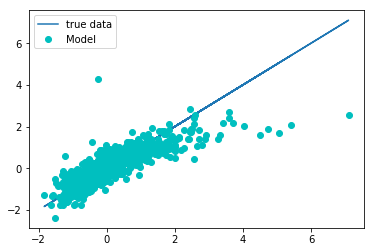

In [22]:
# Create the Model
model_linear = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=42)

# Train and evaluate
scores = train_and_evaluation(model_linear, house_x_train[columns], house_y_train)

# Plot
plot_model(model_linear, house_x_train[columns], house_y_train)

Coefficient of determination on training set: 0.6943099317767183
Average coefficient of determination using 5-fold crossvalidation: 0.68092996431


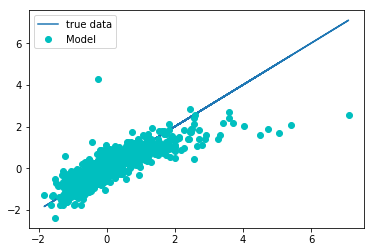

In [23]:
# Create the Model
model_linear_l2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', random_state=42)

# Train and evaluate
scores = train_and_evaluation(model_linear_l2, house_x_train[columns], house_y_train)

# Plot
plot_model(model_linear_l2, house_x_train[columns], house_y_train)

## 7.2 Support Vector Machines (SVM) 

This is another algorithm that can be used to perform regression.

[Documentation](http://scikit-learn.org/stable/modules/svm.html#regression)

In [24]:
from sklearn import svm

Coefficient of determination on training set: 0.6831194154595317
Average coefficient of determination using 5-fold crossvalidation: 0.677222621838


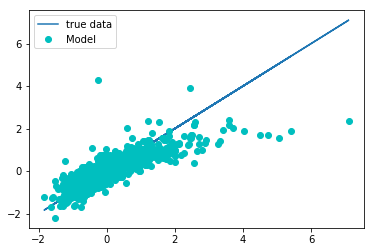

In [25]:
# Create the Model
model_svr = svm.SVR(kernel='linear')

# Train and evaluate
train_and_evaluation(model_svr, house_x_train[columns], house_y_train)

# Plot
plot_model(model_svr, house_x_train[columns], house_y_train)

Coefficient of determination on training set: 0.583754551748527
Average coefficient of determination using 5-fold crossvalidation: -2.83864914801


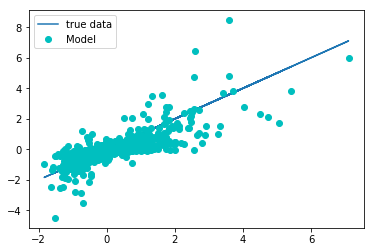

In [30]:
# Create the Model
model_svr_poly = svm.SVR(kernel='poly')

# Train and evaluate
train_and_evaluation(model_svr_poly, house_x_train[columns], house_y_train)

# Plot
plot_model(model_svr_poly, house_x_train[columns], house_y_train)

Coefficient of determination on training set: 0.8265060788082529
Average coefficient of determination using 5-fold crossvalidation: 0.779981094913


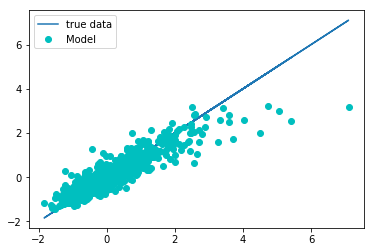

In [31]:
# Create the Model
model_svr_rbf = svm.SVR(kernel='rbf')

# Train and evaluate
train_and_evaluation(model_svr_rbf, house_x_train[columns], house_y_train)

# Plot
plot_model(model_svr_rbf, house_x_train[columns], house_y_train)

## 7.3 Random Forest

This is yet another algorithm, but this time based on Decisions Trees.

In this example it is intersting to see that we can find out what features / columns **are most important** to the algorithm for predicting the prices.

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)

In [32]:
from sklearn import ensemble

Coefficient of determination on training set: 0.999907999793311
Average coefficient of determination using 5-fold crossvalidation: 0.72223659448


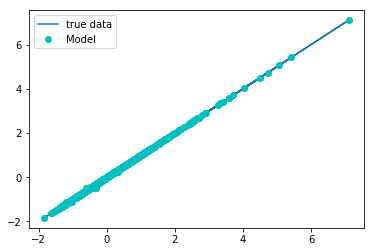

In [35]:
# Create the Model
model_rf = ensemble.ExtraTreesRegressor(n_estimators=10, random_state=42)

# Train and evaluate
train_and_evaluation(model_rf, house_x_train[columns], house_y_train)

# Plot
plot_model(model_rf, house_x_train[columns], house_y_train)

In [36]:
# Here we print the importance of the features
sorted(zip(model_rf.feature_importances_, columns))

[(0.029246795297251264, 'OverallCond'),
 (0.059059783274498914, 'MSSubClass'),
 (0.10346435989475322, 'LotArea'),
 (0.18024481407687637, '1stFlrSF'),
 (0.62798424745662029, 'OverallQual')]

We see that `OverallQual` weights in at 60% for deciding the price of the house.
Also note that we should definitely use more features, but here let's keep it simple.

## 7.4 AdaBoost

And this is the final algorithm that we will try.

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Coefficient of determination on training set: 0.7673068800538696
Average coefficient of determination using 5-fold crossvalidation: 0.677589531918


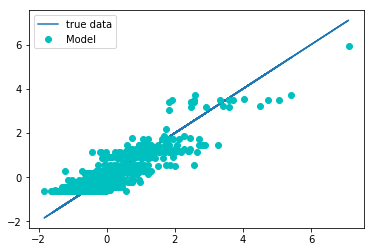

In [41]:
# Create the Model
model_ada = ensemble.AdaBoostRegressor(n_estimators=10)

# Train and evaluate
train_and_evaluation(model_ada, house_x_train[columns], house_y_train)

# Plot
plot_model(model_ada, house_x_train[columns], house_y_train)

# 8. Model Evaluation

Let's finish by making a small method that will evaluate our model.

Before, we trained and evaluate our model on training data.
Now we will measure the model on the validation data and get our final coefficient of determination.

In [38]:
from sklearn import metrics

def measure_r2_score(model, x, y):
    predictions = model.predict(x)

    print('Coefficient of determination: {0:.3f}'.format( metrics.r2_score(y, predictions) ))

In [46]:
models = {
    'Linear': model_linear,
    'Linear l2': model_linear_l2,
    'SVM-Linear': model_svr,
    'SVM-Poly': model_svr_poly,
    'SVM-RBF': model_svr_rbf,
    'Random Forest': model_rf,
    'Adaboost': model_ada
}

for key, model in models.items():
    print('\nModel: {}'.format(key))
    measure_r2_score(model, house_x_validation[columns], house_y_validation)


Model: Linear l2
Coefficient of determination: 0.722

Model: Random Forest
Coefficient of determination: 0.791

Model: SVM-Poly
Coefficient of determination: 0.468

Model: SVM-RBF
Coefficient of determination: 0.785

Model: Linear
Coefficient of determination: 0.722

Model: Adaboost
Coefficient of determination: 0.749

Model: SVM-Linear
Coefficient of determination: 0.714


# 9. Predict Values

Finally, ones you are happy with a model, you can predict values of new houses!

In [47]:
prediction = model_rf.predict( house_test[columns] )
print('Predictions (scaled): \n{}'.format(prediction)) # Those are the predictions scaled

# We can inverse transform the predictions to get the real dollar price
prediction = y_scaler.inverse_transform(prediction)
print('\nPredictions ($): \n{}'.format(prediction))

# We can add the predictions as a column to our test data and then print.
house_test['Prediction'] = prediction

# Print the house_test, note that many features are scalled.
house_test.head(20)

Predictions (scaled): 
[-0.55733845 -0.51339226 -0.46050572 ..., -0.36751355 -0.55431636
  0.46941594]

Predictions ($): 
[ 136660.  140150.  144350. ...,  151735.  136900.  218200.]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prediction
0,1461,-0.872563,RH,80.0,0.110763,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,136660.0
1,1462,-0.872563,RL,81.0,0.375850,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,140150.0
2,1463,0.073375,RL,74.0,0.332053,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,144350.0
3,1464,0.073375,RL,78.0,-0.054002,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,182150.0
4,1465,1.492282,RL,43.0,-0.552407,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,185700.0
5,1466,0.073375,RL,75.0,-0.051798,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,175310.0
6,1467,-0.872563,RL,NaN,-0.254246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,148740.0
7,1468,0.073375,RL,63.0,-0.211952,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,173090.0
8,1469,-0.872563,RL,85.0,-0.034158,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,180650.0
9,1470,-0.872563,RL,70.0,-0.212153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,118876.6


# 10. Validation Curves: Plot scores to evaluate models (OPTIONAL)

This next section is more advanced.
It consists of plotting different things such as the scores and learning curves in order to visualize and evaluate our model.

[Documentation](http://scikit-learn.org/stable/modules/learning_curve.html)

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

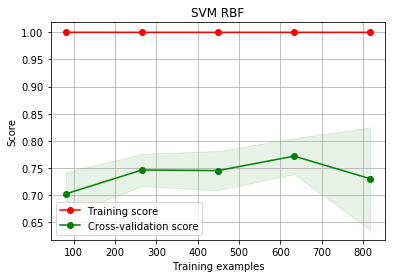

In [52]:
# Plot the Model that uses SVM with RBF

cv = KFold(house_x_train[columns].shape[0], 5, shuffle=True, random_state=33)
plot_learning_curve(model_rf, 'SVM RBF', house_x_train[columns], house_y_train, cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

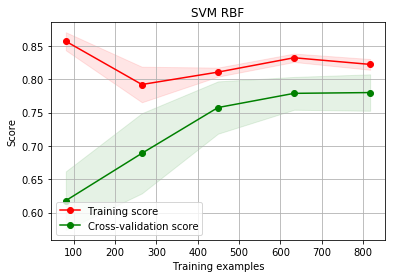

In [53]:
plot_learning_curve(model_svr_rbf, 'SVM RBF', house_x_train[columns], house_y_train, cv=cv, n_jobs=4)